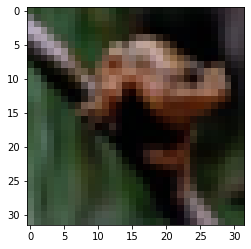

Con nay la [6]


In [41]:
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels ) = cifar10.load_data()

hinh = train_images[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('Con nay la',train_labels[5000])

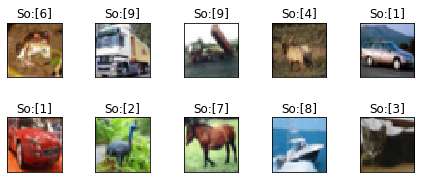

In [42]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [43]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [44]:
train_images = train_images.reshape((50000,32*32*3))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,32*32*3))
test_images = test_images.astype('float32')/255

In [45]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [46]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)

print('test_acc:',test_acc)
print('test_loss',test_loss)

Epoch 1/10
391/391 [==============================] - 12s 30ms/step - loss: 2.2151 - accuracy: 0.2674
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 1.7931 - accuracy: 0.3592
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.7064 - accuracy: 0.3941
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6522 - accuracy: 0.4149
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6145 - accuracy: 0.4304
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 1.5851 - accuracy: 0.4385
Epoch 7/10
391/391 [==============================] - 9s 24ms/step - loss: 1.5606 - accuracy: 0.4472
Epoch 8/10
391/391 [==============================] - 11s 29ms/step - loss: 1.5361 - accuracy: 0.4552
Epoch 9/10
391/391 [==============================] - 9s 23ms/step - loss: 1.5177 - accuracy: 0.4608
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 1.5452 - accu

1/1 [==============================] - 0s 20ms/step


array([1])

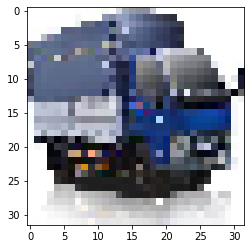

In [49]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('xe_tai.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)